In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOAD YOLO MODEL

---



In [ ]:
yolo = cv2.dnn.readNet('./yolov3-tiny.weights','./yolov3-tiny.cfg') # Load YOLO model

In [ ]:
classes = []  # INITIALISES empty list to store the class names.
with open('./coco.names','r') as f:       # Open the file 'coco.names' for reading. The file path './coco.names' specifies where the file is located. #download coco.names from darknet for yolo3
    classes = f.read().splitlines() # Read the entire content of the file into a single string and split it into a list of lines. Each line corresponds to a class name, which is then stored in the 'classes' list.

In [ ]:
len(classes)

80

In [ ]:
classes   #Displays the list of class names.


['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
image = cv2.imread('./person.jpg')   # Load an image from the file 'person.jpg' and store it in the variable 'image'.
height,width,_ = image.shape  # Extract the height, width, and number of color channels of the image.

In [ ]:
blob = cv2.dnn.blobFromImage(image,1/255,(416,416),(0,0,0),swapRB=True,crop=False) #Converts the input image into a blob, which is a format suitable for input into a deep learning model

Converts the input image into a blob, which is a format suitable for input into a deep learning model, specifically for models using the OpenCV dnn module.

Function: cv2.dnn.blobFromImage() preprocesses the image for the neural network by performing several operations, such as resizing and normalization.

Parameters:

image: The input image that you want to convert into a blob. This should be a NumPy array representing the image, as obtained from cv2.imread().

1/255:

Purpose: Scale factor for pixel values.
Usage: Normalizes pixel values from the range [0, 255] to [0, 1]. This is a common preprocessing step because many neural networks expect input values in the range [0, 1].
Value: 1/255 scales the pixel values accordingly.
(416, 416):

Purpose: Size to which the input image is resized.
Usage: Resize the input image to a fixed size (416x416 pixels in this case) to match the input dimensions expected by the model. YOLO models, for instance, often require images to be of a specific size.
Value: The model expects input images of size 416x416 pixels.
(0, 0, 0):

Purpose: Mean subtraction values for normalization.
Usage: Subtracts these values from each pixel. Here, (0, 0, 0) indicates that no mean subtraction is performed (common when the image is already normalized).
Value: (0, 0, 0) implies that no mean value is subtracted from the pixel values.
swapRB=True:

Purpose: Indicates whether to swap the Red and Blue channels.
Usage: OpenCV loads images in BGR format by default, while many models expect RGB format. Setting swapRB=True converts the image from BGR to RGB.
Value: True ensures that the Red and Blue channels are swapped.
crop=False:

Purpose: Determines whether to crop the image.
Usage: If True, the image would be cropped to fit the specified size. If False, the image is resized to fit the specified dimensions without cropping.
Value: False means the image will be resized to 416x416 pixels without cropping.

Parameters:

---


Scaling: Normalizes pixel values from [0, 255] to [0, 1].
Resize: Adjusts the image size to 416x416 pixels.
Mean Subtraction: No mean values are subtracted.
Channel Swap: Converts from BGR to RGB if needed.
Crop: Resizes without cropping.
This preprocessing step is essential for ensuring that the input image is in the correct format and size for the model to make accurate predictions.

# **TO PRINT IMAGE**

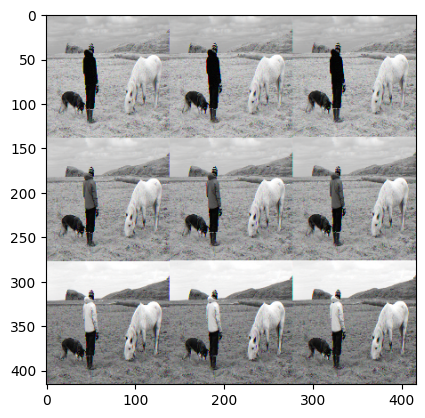

In [ ]:
i = blob[0].reshape(416,416,3) # Reshapes the 4D tensor blob to a 3D array suitable for visualization, with dimensions corresponding to height, width, and color channels.
plt.imshow(i)  #Displays

Purpose: Reshapes the blob into the original image dimensions for visualization.
Explanation:
blob: This is a 4D array (or tensor) created by cv2.dnn.blobFromImage(). Its shape is typically (1, 3, 416, 416) where:
The first dimension (1) represents the number of images in the batch.
The second dimension (3) represents the number of color channels (BGR).
The third and fourth dimensions (416, 416) represent the height and width of the image after resizing.
blob[0]: Extracts the image tensor from the batch. Since there's only one image in the batch, blob[0] gives a tensor with shape (3, 416, 416), where:
3 represents the color channels (B, G, R).
416x416 represents the image size.
.reshape(416, 416, 3):
Purpose: Reshapes the tensor into an image format suitable for display.
Details: Changes the shape from (3, 416, 416) to (416, 416, 3), which is the height x width x channels format expected by matplotlib for image display.
plt.imshow(i)

Purpose: Displays the image using matplotlib.
Explanation:
plt.imshow(i):
Function: plt.imshow() is used to display an image in a plot.
Input: i is the reshaped image array in the format (416, 416, 3).
Behavior: Shows the image in a window created by matplotlib. The color channels are expected to be in RGB format. Since the blob was originally in BGR format and you did not swap the channels back, the displayed image may have incorrect colors.
Summary
i = blob[0].reshape(416, 416, 3): Reshapes the 4D tensor blob to a 3D array suitable for visualization, with dimensions corresponding to height, width, and color channels.
plt.imshow(i): Displays the reshaped image using matplotlib. Note that if the blob's color channels were originally in BGR format, you might need to convert them to RGB for accurate color representation.

In [ ]:
yolo.setInput(blob) #Configures the YOLO model to use the preprocessed image blob as its input. This prepares the model to perform inference on the provided image data.

yolo:

Purpose: Represents the YOLO (You Only Look Once) model, which has been loaded using cv2.dnn.readNet().
Type: An instance of the cv2.dnn.Net class, which is used for running inference with a deep learning model in OpenCV.
.setInput(blob):

Purpose: Sets the input for the YOLO model to be the preprocessed image blob.
Explanation:
setInput:
Function: This method is part of the cv2.dnn.Net class.
Usage: It specifies the input data for the model before running forward propagation (inference).
blob:
Type: A preprocessed image blob created by cv2.dnn.blobFromImage().
Format: This is a 4D tensor with the shape (1, 3, 416, 416), where:
The first dimension (1) represents the batch size (one image in this case).
The second dimension (3) represents the number of color channels (BGR).
The third and fourth dimensions (416, 416) represent the height and width of the resized image.
Purpose: The blob contains the normalized and resized image data that is now in the format expected by the YOLO model.

In [ ]:
output_layers_names = yolo.getUnconnectedOutLayersNames() #Retrieves the names of the layers that provide the model's outputs.
layerOutputs = yolo.forward(output_layers_names)  #Performs a forward pass through the YOLO model to obtain predictions from the specified output layers. The result is a list of arrays containing the detection results.

output_layers_names = yolo.getUnconnectedOutLayersNames()

Purpose: Retrieves the names of the output layers of the YOLO model.

Explanation:

yolo:
Type: An instance of the cv2.dnn.Net class, representing the YOLO model.
getUnconnectedOutLayersNames():
Function: This method returns the names of the output layers of the network.
Purpose: YOLO models have specific layers designed to produce predictions, and you need to know these layers to obtain the output results.
Details: Output layers typically include detection layers that provide the final predictions (bounding boxes, class labels, confidences).
Result: output_layers_names will be a list of strings, each representing the name of an output layer.

layerOutputs = yolo.forward(output_layers_names)

Purpose: Runs the forward pass of the network and obtains the output from the specified layers.

Explanation:

yolo:
Type: An instance of the cv2.dnn.Net class.
forward():
Function: Executes the forward pass through the network to compute the outputs.
Purpose: The forward pass processes the input data (in this case, the image blob) through the network and generates predictions.
Input: output_layers_names, which specifies which layers' outputs are requested.
Output: layerOutputs is a list of arrays where each array corresponds to the output of a specified layer. These arrays contain the model's predictions, such as bounding boxes, class scores, and confidences.
Result: layerOutputs will be a list of NumPy arrays, each representing the output from an output layer of the YOLO model.

In [ ]:
boxes = []  ## Initialize lists to store bounding boxes, confidence scores, and class IDs
confidences = []
class_ids = []

for output in layerOutputs: ## Iterate over each output from the YOLO model
    for detection in output: # Iterate over each detection in the current output
        scores = detection[5:] # Extract the class scores from the detection
        class_id = np.argmax(scores) # Determine the class with the highest score
        confidence = scores[class_id]  # Retrieve the confidence score for the detected class
        if confidence > 0.5:  # Filter out detections with confidence score less than 0.5
          Center_x = int(detection[0]*width)  # Calculate the center x-coordinate of the bounding box
          Center_y = int(detection[1]*height) # Calculate the center y-coordinate of the bounding box
          w = int(detection[2]*width)  # Calculate the width of the bounding box
          h = int(detection[3]*height)# Calculate the height of the bounding box
          x = int(Center_x - w/2)  # Calculate the x-coordinate of the top-left corner of the bounding box
          y = int(Center_y - h/2)  # Calculate the y-coordinate of the top-left corner of the bounding box
          boxes.append([x,y,w,h])  # Append the bounding box coordinates to the list
          confidences.append((float(confidence))) # Append the confidence score to the list
          class_ids.append(class_id)  # Append the class ID to the list

boxes = []

Purpose: Initializes an empty list to store the bounding boxes of detected objects.
Details: Each bounding box will be represented as a list [x, y, w, h], where x and y are the coordinates of the top-left corner, and w and h are the width and height.
confidences = []

Purpose: Initializes an empty list to store the confidence scores for detected objects.
Details: Confidence scores indicate the model's certainty about the detected object. They are used for filtering and ranking detections.
class_ids = []

Purpose: Initializes an empty list to store the class IDs of detected objects.
Details: Class IDs represent the predicted categories of detected objects (e.g., person, car, etc.).
for output in layerOutputs:

Purpose: Iterates over the outputs from the YOLO model.
Details: layerOutputs is a list where each element corresponds to the output from a specific layer in the YOLO model.
for detection in output:

Purpose: Iterates over each detection in the current output layer.
Details: Each detection is an array representing a potential object detected by the YOLO model.
scores = detection[5:]

Purpose: Extracts the class scores from the detection.
Details: YOLO detections include bounding box coordinates, objectness score, and class scores. detection[5:] retrieves the class scores (starting from the 6th element onward).
class_id = np.argmax(scores)

Purpose: Determines the class with the highest score.
Details: np.argmax(scores) returns the index of the highest score, which corresponds to the predicted class ID.
confidence = scores[class_id]

Purpose: Retrieves the confidence score for the detected class.
Details: This score reflects the model's certainty about the class of the detected object.
if confidence > 0.5:

Purpose: Filters out detections with low confidence.
Details: Only detections with a confidence score greater than 0.5 are considered valid. This threshold helps reduce false positives.
Center_x = int(detection[0] * width)

Purpose: Computes the x-coordinate of the center of the bounding box.
Details: detection[0] represents the relative x-coordinate of the bounding box center (scaled from 0 to 1). Multiplying by the image width converts this to absolute coordinates.
Center_y = int(detection[1] * height)

Purpose: Computes the y-coordinate of the center of the bounding box.
Details: detection[1] represents the relative y-coordinate of the bounding box center (scaled from 0 to 1). Multiplying by the image height converts this to absolute coordinates.
w = int(detection[2] * width)

Purpose: Computes the width of the bounding box.
Details: detection[2] represents the relative width of the bounding box (scaled from 0 to 1). Multiplying by the image width converts this to absolute dimensions.
h = int(detection[3] * height)

Purpose: Computes the height of the bounding box.
Details: detection[3] represents the relative height of the bounding box (scaled from 0 to 1). Multiplying by the image height converts this to absolute dimensions.
x = int(Center_x - w / 2)

Purpose: Computes the x-coordinate of the top-left corner of the bounding box.
Details: The top-left corner's x-coordinate is derived by subtracting half of the bounding box width from the center x-coordinate.
y = int(Center_y - h / 2)

Purpose: Computes the y-coordinate of the top-left corner of the bounding box.
Details: The top-left corner's y-coordinate is derived by subtracting half of the bounding box height from the center y-coordinate.
boxes.append([x, y, w, h])

Purpose: Adds the computed bounding box coordinates to the boxes list.
Details: Each bounding box is represented as [x, y, w, h], where x and y are the top-left corner coordinates, and w and h are the dimensions.
confidences.append(float(confidence))

Purpose: Adds the confidence score to the confidences list.
Details: The confidence score is converted to a float and appended to the list for later use in filtering and ranking detections.
class_ids.append(class_id)

Purpose: Adds the class ID to the class_ids list.
Details: The class ID corresponds to the predicted category of the detected object.

boxes = []: Initializes an empty list for bounding boxes.
confidences = []: Initializes an empty list for confidence scores.
class_ids = []: Initializes an empty list for class IDs.
for output in layerOutputs:: Iterates over outputs from the YOLO model.
for detection in output:: Iterates over each detection within a given output.
scores = detection[5:]: Extracts class scores from the detection.
class_id = np.argmax(scores): Finds the index of the highest score, indicating the class ID.
confidence = scores[class_id]: Retrieves the confidence score for the detected class.
if confidence > 0.5:: Filters detections based on confidence threshold.
Center_x = int(detection[0] * width): Computes the center x-coordinate of the bounding box.
Center_y = int(detection[1] * height): Computes the center y-coordinate of the bounding box.
w = int(detection[2] * width): Computes the width of the bounding box.
h = int(detection[3] * height): Computes the height of the bounding box.
x = int(Center_x - w / 2): Computes the x-coordinate of the top-left corner.
y = int(Center_y - h / 2): Computes the y-coordinate of the top-left corner.
boxes.append([x, y, w, h]): Adds the bounding box coordinates to the list.
confidences.append(float(confidence)): Adds the confidence score to the list.
class_ids.append(class_id): Adds the class ID to the list.

In [ ]:
len(boxes)

6

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4) # Apply Non-Maximum Suppression (NMS) to remove duplicate overlapping bounding boxes


Purpose: The code uses Non-Maximum Suppression to reduce the number of overlapping bounding boxes, keeping only the most confident detections. This helps in avoiding redundant detections of the same object and improves the clarity of the output.

indexes =: Stores the indices of the bounding boxes that have been selected after applying Non-Maximum Suppression (NMS).

cv2.dnn.NMSBoxes(): Calls the OpenCV function NMSBoxes which performs Non-Maximum Suppression to filter out overlapping bounding boxes. This function helps in eliminating multiple detections of the same object.

boxes: List of bounding boxes, where each box is defined by [x, y, w, h]. These are the boxes proposed by the object detection model.

confidences: List of confidence scores associated with each bounding box. These scores reflect the likelihood that a bounding box contains an object.

0.5: The threshold for confidence score. Bounding boxes with a confidence score below this threshold are ignored. In this case, it's set to 0.5, meaning only detections with a confidence score greater than 0.5 are considered.

0.4: The threshold for Intersection Over Union (IoU). This value determines how much overlap between bounding boxes is allowed before one of them is suppressed. In this case, bounding boxes with an IoU greater than 0.4 will lead to suppression of overlapping boxes.

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN # Define the font type for text drawing
colors = np.random.uniform(0,255,size=(len(boxes),3)) # Generate random colors for each bounding box

In [ ]:
for i in np.array(indexes).flatten(): # Iterate over the indices of the bounding boxes that passed Non-Maximum Suppression
    x,y,w,h = boxes[i]  # Get the coordinates and dimensions of the bounding box
    label = str(classes[class_ids[i]])    # Get the class label and confidence score for the current bounding box
    confidence = str(round(confidences[i],2))
    color = colors[i]  # Retrieve the color for the current bounding box
    cv2.rectangle(image,(x,y),(x+w,y+h),color,3)    # Draw a rectangle around the detected object
    cv2.putText(image,label + " " + confidence, (x, y+20), font, 2, (255,255,255), 3)   # Put the label and confidence score on the image


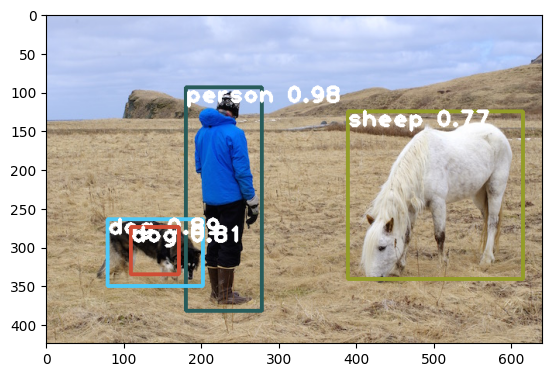

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) # Convert the BGR image to RGB for correct color display in matplotlib

In [ ]:
cv2.imwrite('person_detection.jpg',image) # Save the image with bounding boxes and labels to a file


True

# **Trying with another image**

---



Tried the same with the image of giraffe and shows probability .Its saved as giraffe_detection.jpg.

For detection of person it is showing a probability of 98% and the 'True' indicates image is being saved as person_detection.jpg.

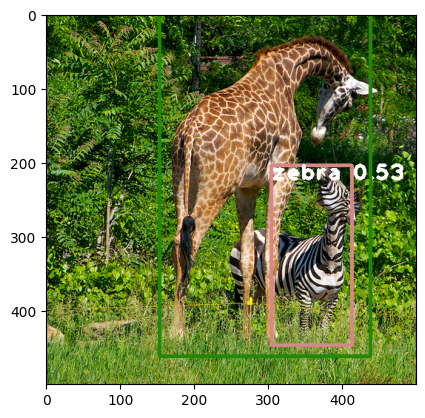

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('giraffe_detection.jpg',image)

True

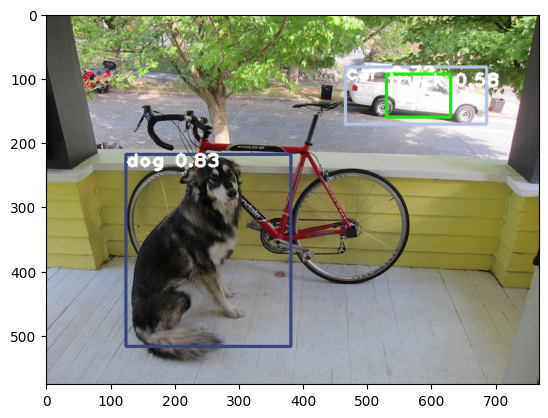

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('dog_detection.jpg',image)

True

probability = 83%